# Manipulate waveform decomposition frame and find corotating angles

### Setup Environment

In [6]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
# Import needed packages from positive
from positive.plotting import sYlm_mollweide_plot
from positive import alert
# Import other usefuls
from os.path import expanduser
from nrutils import scsearch,gwylm
from nrutils.core.basics import *
from numpy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find a simulation

In [87]:
A = scsearch(institute='bam',keyword='q1.2_dqdcp2',verbose=True)
# A = scsearch(institute='gt',keyword='Sq4_d9_a0.6_oth.090_rr_M140',verbose=True)
# A = scsearch(q=1,keyword='hrq',verbose=True)

(scsearch)>> Found institute (='bam') keyword.
(scsearch)>> Found keyword (='q1.2_dqdcp2') keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 2 possibly degenerate simulations:
[0001][silures] BAM: 1chi0.67-2chi0.42-p-q1.50	(q1.2_dqdcp2)
[0002][hogshead] dirac-nr-followup: 1chi0.67-2chi0.42-p-q1.50	(q1.2_dqdcp2)



### Load waveform data

In [88]:
y = gwylm( A[0], lmax=2, clean=True )
# y = gwylm( A[0], lm=[(2,2),(2,1),(2,0)], clean=False )

### Try to calculate corotating angles

In [89]:

# Options
kind = 'psi4'
domain = 'time'

# Construct dictionary of multipoles using all multipoles available
mp = { (l,m) : ( y.lm[l,m][kind].y if domain in ('t','time') else y.lm[l,m][kind].fd_y ) for l,m in y.lm  }
t = y.lm[2,2][kind].t

# Calculate corotating angles using low-level function
alpha,beta,gamma = calc_coprecessing_angles( mp, t )
x,yy,z            = calc_coprecessing_angles( mp, t, return_xyz=True )


### Plot the angles and the waveform amplitude for reference

(418.64999999999998, 1374.0)

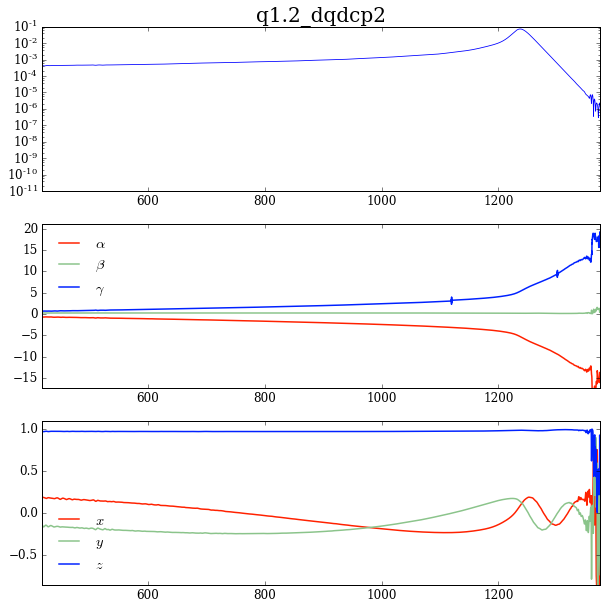

In [91]:

#
fig = figure( figsize=2.5*figaspect(1) )
clr = rgb(3,jet=True); grey = ones(3)*0.8
lw = 1.5

#
mask = (t>=t[y.preinspiral.right_index]) & (t<=t[y.postringdown.left_index])

#
ax = subplot(3,1,1)
title( y.simname )
plot( t, y.lm[2,2][kind].amp )
plot( t, y.lm[2,2][kind].plus, color=grey )
yscale('log')

#
subplot(3,1,2,sharex=ax)
plot( t, alpha, color = clr[0], linewidth = lw, label=r'$\alpha$' )
plot( t, beta,  color = clr[1], linewidth = lw, label=r'$\beta$' )
plot( t, gamma, color = clr[2], linewidth = lw, label=r'$\gamma$' )
legend( frameon=False, loc='best' )
ylim( lim( hstack([alpha[mask],gamma[mask],beta[mask]]), dilate=0.1 ) )

#
subplot(3,1,3,sharex=ax)
plot( t, x, color = clr[0], linewidth = lw, label=r'$x$' )
plot( t, yy,  color = clr[1], linewidth = lw, label=r'$y$' )
plot( t, z, color = clr[2], linewidth = lw, label=r'$z$' )
legend( frameon=False, loc='best' )
ylim( lim( hstack([x[mask],yy[mask],z[mask]]), dilate=0.1 ) )

#
ax.set_xlim( [ t[y.preinspiral.right_index], t[y.postringdown.left_index] ] )